<a href="https://colab.research.google.com/github/dunliangyang2010/Pantograph/blob/main/Fast_RCNN_Tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Tensorflow Repo and Python Modules
By executing the first code snippet you initialize your virtual linux-style machine. Use The little arrow ">" in the top left corner to view the file system of your hosted system.
You can use UNIX-style terminal commands by using the prefix % and elevated priviledge commands for installations with the prefix !.

# Install Tensorflow on Virtual Machine

In [1]:
!pip install numpy==1.16.0

In [2]:
%cd
%tensorflow_version 1.x

#make sure to be in /root and that tensorflow is running in version 1.15.2
import tensorflow as tf
print(tf.__version__)

/root
TensorFlow 1.x selected.
1.15.2


# Download Faster RCNN TF repo
https://codingnote.cc/zh-tw/p/326396/  
https://tn00343140a.pixnet.net/blog/post/303962732

In [3]:
!git clone https://github.com/dBeker/Faster-RCNN-TensorFlow-Python3

Cloning into 'Faster-RCNN-TensorFlow-Python3'...
remote: Enumerating objects: 276, done.
remote: Total 276 (delta 0), reused 0 (delta 0), pack-reused 276
Receiving objects: 100% (276/276), 3.39 MiB | 24.47 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [4]:
cd Faster-RCNN-TensorFlow-Python3

/root/Faster-RCNN-TensorFlow-Python3


In [ ]:
!pip install -r requirements.txt

# Generate some files

Go to ./data/coco/PythonAPI  
Run `python setup.py build_ext --inplace`  
Run `python setup.py build_ext install`  
Go to ./lib/utils and run `python setup.py build_ext --inplace`

In [6]:
cd /root/Faster-RCNN-TensorFlow-Python3/data/coco/PythonAPI

/root/Faster-RCNN-TensorFlow-Python3/data/coco/PythonAPI


In [ ]:
!python setup.py build_ext --inplace

In [ ]:
!python setup.py build_ext install

## download voc2007 data

In [9]:
cd /root/Faster-RCNN-TensorFlow-Python3/data

/root/Faster-RCNN-TensorFlow-Python3/data


In [ ]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar

!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar

!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCdevkit_08-Jun-2007.tar

In [ ]:
!tar xvf VOCtrainval_06-Nov-2007.tar
!tar xvf VOCtest_06-Nov-2007.tar
!tar xvf VOCdevkit_08-Jun-2007.tar

# 重新命名VOCdevkit >> VOCdevkit2007

## Download Pretrained weights

In [12]:
pwd

'/root/Faster-RCNN-TensorFlow-Python3/data'

In [13]:
!wget http://download.tensorflow.org/models/vgg_16_2016_08_28.tar.gz

--2022-03-10 05:42:53--  http://download.tensorflow.org/models/vgg_16_2016_08_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.107.128, 2607:f8b0:400c:c32::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.107.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 513324920 (490M) [application/x-tar]
Saving to: ‘vgg_16_2016_08_28.tar.gz’

vgg_16_2016_08_28.t 100%[===================>] 489.54M   106MB/s    in 4.8s    

2022-03-10 05:42:58 (102 MB/s) - ‘vgg_16_2016_08_28.tar.gz’ saved [513324920/513324920]



In [17]:
!tar xvf vgg_16_2016_08_28.tar.gz 

vgg_16.ckpt


In [18]:
# rename
!mv vgg_16.ckpt vgg16.ckpt

In [19]:
# 先在data創建imagenet_weights資料夾
!mv /root/Faster-RCNN-TensorFlow-Python3/data/vgg16.ckpt /root/Faster-RCNN-TensorFlow-Python3/data/imagenet_weights

# Config setting
打開源碼的lib\config文件夾下的config.py文件，修改其中一些重要參數
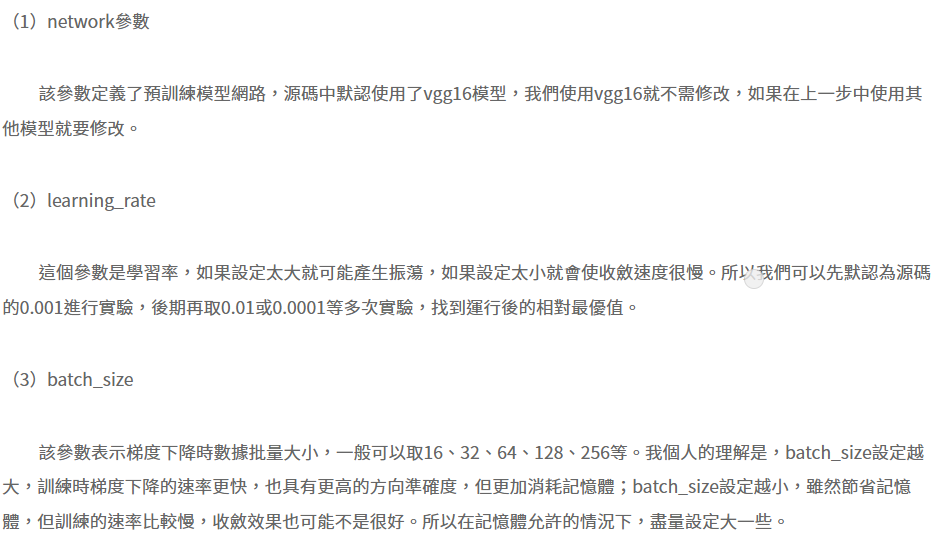

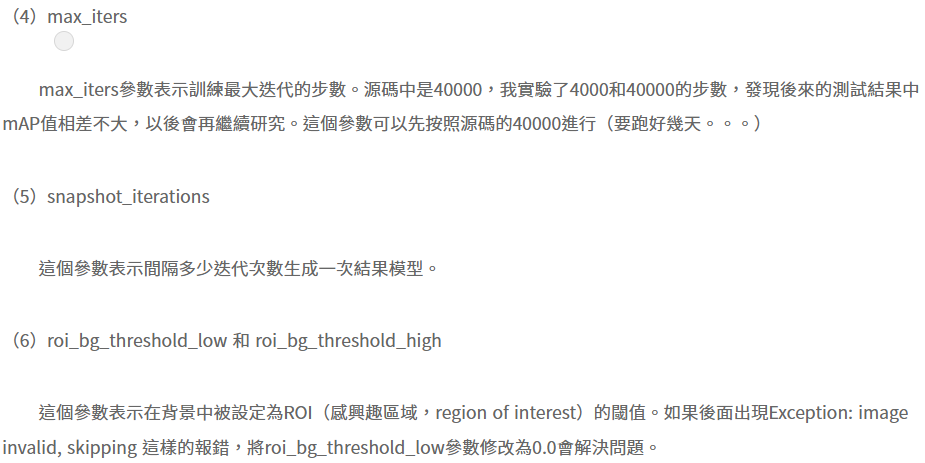

# Prepare Dataset
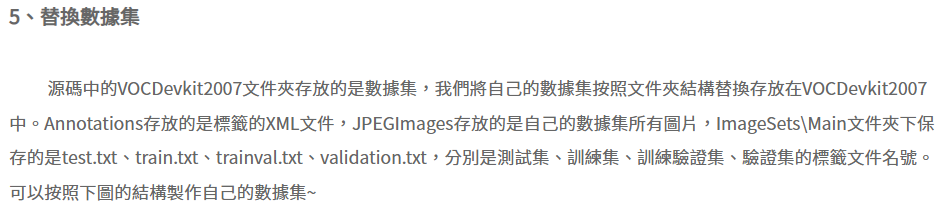

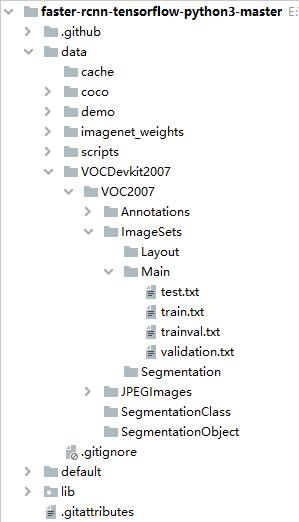

In [20]:
!rm -r /root/Faster-RCNN-TensorFlow-Python3/data/VOCdevkit2007/VOC2007/Annotations/*.xml
!rm -r /root/Faster-RCNN-TensorFlow-Python3/data/VOCdevkit2007/VOC2007/JPEGImages/*.jpg
!rm -r /root/Faster-RCNN-TensorFlow-Python3/data/VOCdevkit2007/VOC2007/ImageSets/Main/*.txt
# 也刪掉train.txt, test.txt, trainval.txt, validation.txt

In [21]:
# xml
!cp -r /content/drive/MyDrive/model/Fast_RCNN/data/xmls/*.xml /root/Faster-RCNN-TensorFlow-Python3/data/VOCdevkit2007/VOC2007/Annotations

In [22]:
# jpg
!cp -r /content/drive/MyDrive/model/Fast_RCNN/data/image/*.jpg /root/Faster-RCNN-TensorFlow-Python3/data/VOCdevkit2007/VOC2007/JPEGImages

In [23]:
# txt
!cp -r /content/drive/MyDrive/model/Fast_RCNN/data/txt/*.txt /root/Faster-RCNN-TensorFlow-Python3/data/VOCdevkit2007/VOC2007/ImageSets/Main

In [ ]:
# 數據集劃分集類(視需求更改)

import os
from sklearn.model_selection import train_test_split

image_path = '/root/Faster-RCNN-TensorFlow-Python3/data/VOCdevkit2007/VOC2007/JPEGImages'
image_list = os.listdir(image_path)
names = []

for i in image_list:
    names.append(i.split('.')[0])     # 獲取圖片名
trainval,test = train_test_split(names,test_size=0.5,shuffle=372)   # shuffle()中是圖片總數目
validation,train = train_test_split(trainval,test_size=0.5,shuffle=372)

with open('/root/Faster-RCNN-TensorFlow-Python3/data/VOCdevkit2007/VOC2007/ImageSets/Main/trainval.txt','w') as f:
    for i in trainval:
        f.write(i+'\n')
with open('/root/Faster-RCNN-TensorFlow-Python3/data/VOCdevkit2007/VOC2007/ImageSets/Main/test.txt','w') as f:
    for i in test:
        f.write(i+'\n')
with open('/root/Faster-RCNN-TensorFlow-Python3/data/VOCdevkit2007/VOC2007/ImageSets/Main/validation.txt','w') as f:
    for i in validation:
        f.write(i+'\n')
with open('/root/Faster-RCNN-TensorFlow-Python3/data/VOCdevkit2007/VOC2007/ImageSets/Main/train.txt','w') as f:
    for i in train:
        f.write(i+'\n')

print('完成!')

完成!


# Modify classes
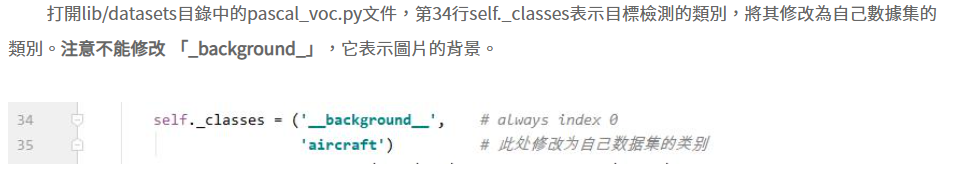

# Delete Cache
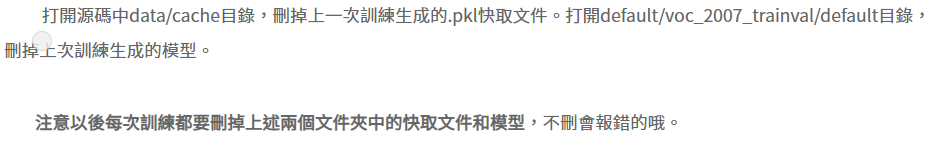

In [ ]:
# 新增cache目錄

## Go to ./lib/utils and run `python setup.py build_ext --inplace`

In [24]:
cd /root/Faster-RCNN-TensorFlow-Python3/lib/utils

/root/Faster-RCNN-TensorFlow-Python3/lib/utils


In [ ]:
!python setup.py build_ext --inplace

# Train
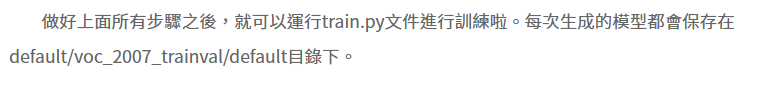

In [ ]:
# 新增default目錄

In [26]:
cd /root/Faster-RCNN-TensorFlow-Python3

/root/Faster-RCNN-TensorFlow-Python3


In [27]:
!python train.py

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Loaded dataset `voc_2007_trainval` for training
Set proposal method: gt
Appending horizontally-flipped training examples...
wrote gt roidb to /root/Faster-RCNN-TensorFlow-Python3/data/cache/voc_2007_trainval_gt_roidb.pkl
done
Preparing training data...
done


2022-03-10 05:48:29.720458: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2022-03-10 05:48:29.720747: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55f1789e12c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-03-10 05:48:29.720780: I tensorflow/compiler/xla/service/servic

# Test
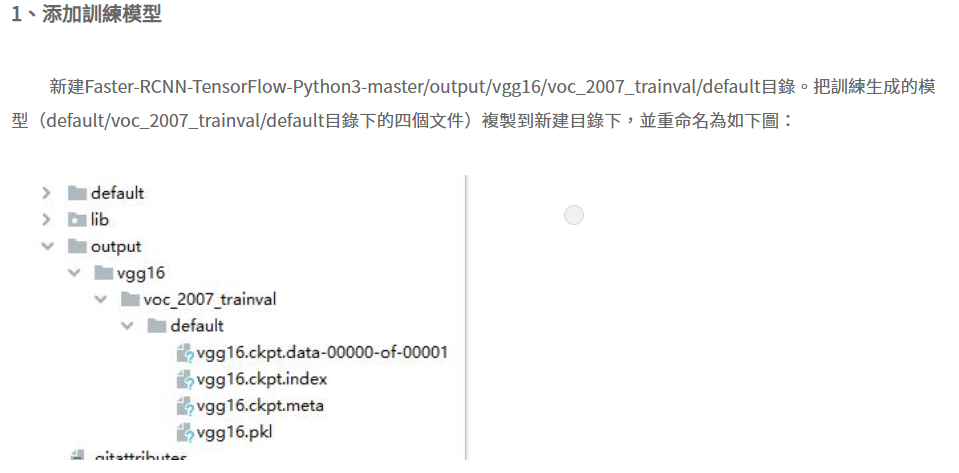

In [29]:
!cp -r /root/Faster-RCNN-TensorFlow-Python3/default/voc_2007_trainval/default /root/Faster-RCNN-TensorFlow-Python3/output/vgg16/voc_2007_trainval

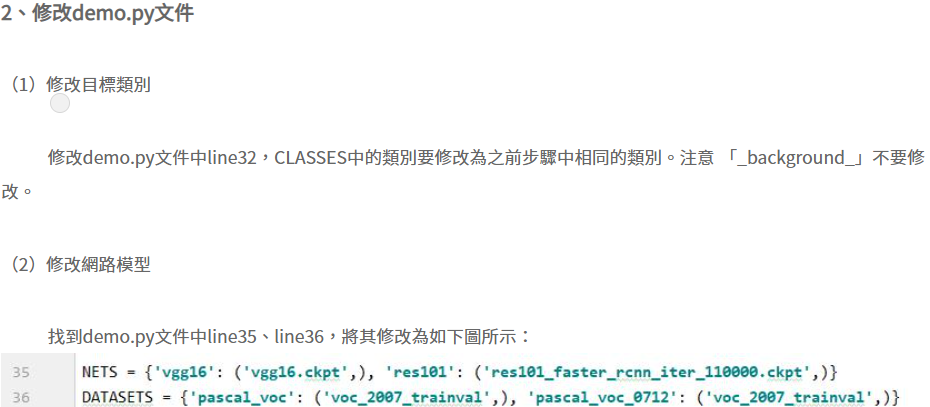

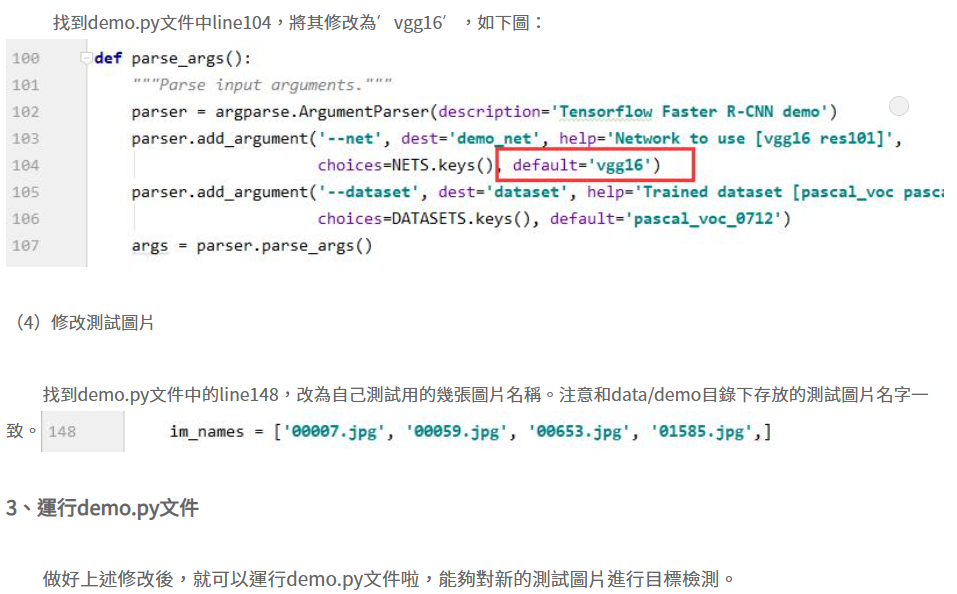

In [ ]:
# 參考https://tn00343140a.pixnet.net/blog/post/303962732 接續更改
# 注意data/demo下要放對應圖片

In [30]:
pwd

'/root/Faster-RCNN-TensorFlow-Python3'

In [33]:
!python /root/Faster-RCNN-TensorFlow-Python3/demo.py

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



2022-03-10 07:19:50.313486: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2022-03-10 07:19:50.313664: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5596eeb932c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-03-10 07:19:50.313693: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-03-10 07:19:50.315584: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-03-10 07:19:50.535954: I tensorflow/stream_executor

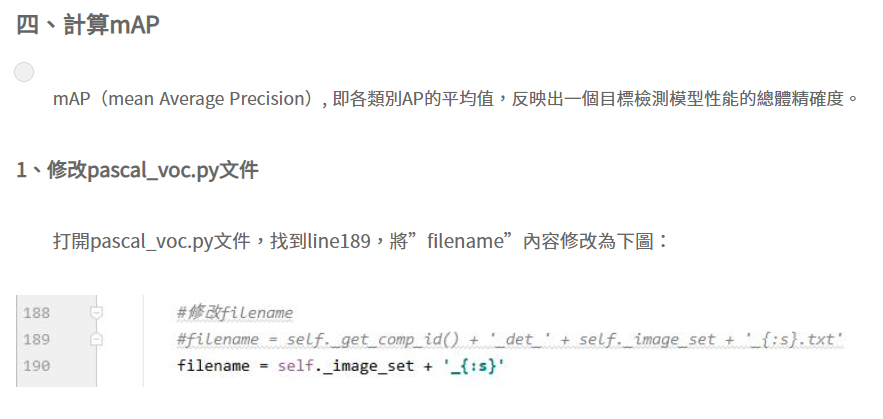

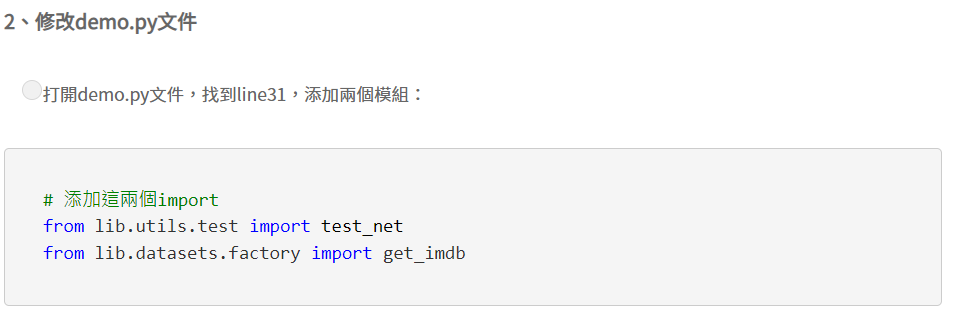

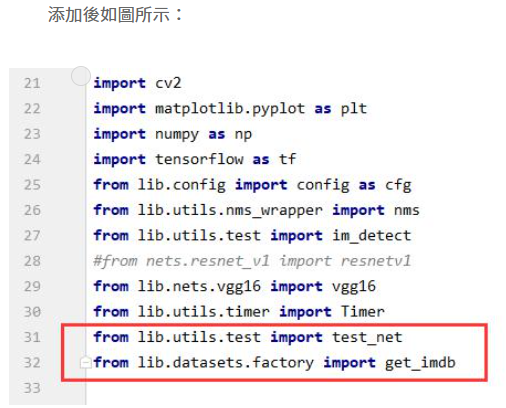

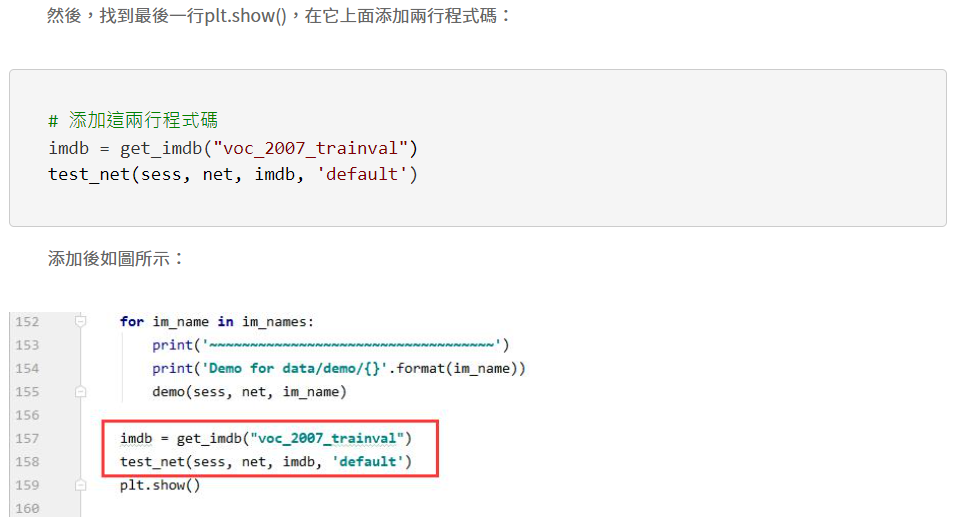

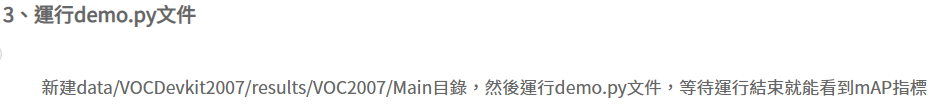

In [35]:
!python /root/Faster-RCNN-TensorFlow-Python3/demo.py

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



2022-03-10 08:29:38.475849: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2022-03-10 08:29:38.476046: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5604088392c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-03-10 08:29:38.476079: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-03-10 08:29:38.478462: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-03-10 08:29:38.704878: I tensorflow/stream_executor

In [ ]:
# /root/Faster-RCNN-TensorFlow-Python3/lib/datasets/pascal_voc.py

In [36]:
!python /root/Faster-RCNN-TensorFlow-Python3/demo.py

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



2022-03-10 08:42:56.036234: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2022-03-10 08:42:56.036438: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x56279c4dd2c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-03-10 08:42:56.036468: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-03-10 08:42:56.038228: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-03-10 08:42:56.263554: I tensorflow/stream_executor

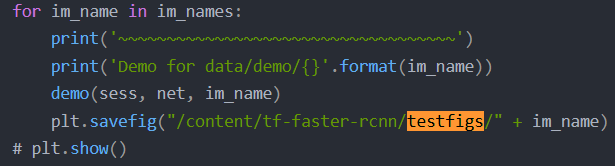

In [37]:
# 保存預測結果 (colab無法顯示視窗)
# 參考網址: https://blog.csdn.net/weixin_45771770/article/details/105709585
# 新建資料夾
!mkdir /root/Faster-RCNN-TensorFlow-Python3/data/testfig 

In [41]:
!python /root/Faster-RCNN-TensorFlow-Python3/demo.py

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



2022-03-10 09:06:26.717924: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2022-03-10 09:06:26.718108: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5578940db2c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-03-10 09:06:26.718138: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-03-10 09:06:26.719968: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-03-10 09:06:26.943021: I tensorflow/stream_executor

In [42]:
!cp -r /root/Faster-RCNN-TensorFlow-Python3/data/testfig /content/drive/MyDrive/model/Fast_RCNN

In [ ]:
# !ln -s $VOCdevkit VOCdevkit2007

ln: failed to create symbolic link './VOCdevkit2007': File exists
